In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [38]:
X_train=pd.read_csv('/Users/zhilinyang/Desktop/train_x_A.csv',header=None)
X_train=X_train.iloc[1:]
len(X_train)

1480

In [39]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,114.988769,1.173018e+08,100.0,0.0,88.840062,8.341604e+08,100.0,0.0,0.0,23423.147906,...,81.093366,39281.881774,32.143074,32.143074,100.0,0.0,100.0,0.0,2.093917e+10,9.043679e+10
2,115.569151,1.278450e+08,100.0,0.0,88.834662,8.335475e+08,100.0,0.0,0.0,23422.579683,...,80.447895,39336.745193,30.065628,30.065628,100.0,0.0,100.0,0.0,2.094975e+10,9.027278e+10
3,115.307311,1.294027e+08,100.0,0.0,88.842702,8.349597e+08,100.0,0.0,0.0,23425.302590,...,80.447895,39314.998048,30.458847,30.458847,100.0,0.0,100.0,0.0,2.094574e+10,9.009846e+10
4,115.049196,1.208911e+08,100.0,0.0,88.826255,8.318848e+08,100.0,0.0,0.0,23422.931048,...,80.445098,39481.919253,31.160019,31.160019,100.0,0.0,100.0,0.0,2.094288e+10,9.009483e+10
5,115.033410,1.195309e+08,100.0,0.0,88.792013,8.261388e+08,100.0,0.0,0.0,23435.059668,...,80.414296,39572.514102,30.767806,30.767806,100.0,0.0,100.0,0.0,2.088422e+10,9.009779e+10


In [40]:
y=[0 for i in range(0,1000)]+[1 for i in range(0,480)]
y_train=np.array(y)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
y_train_df=pd.DataFrame(y_train,index=range(1,1481))
y_train_df.head()

,0
1,0
2,0
3,0
4,0
5,0


In [45]:
dataset=pd.concat([X_train,y_train_df],axis=1,ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1,114.988769,1.173018e+08,100.0,0.0,88.840062,8.341604e+08,100.0,0.0,0.0,23423.147906,...,39281.881774,32.143074,32.143074,100.0,0.0,100.0,0.0,2.093917e+10,9.043679e+10,0
2,115.569151,1.278450e+08,100.0,0.0,88.834662,8.335475e+08,100.0,0.0,0.0,23422.579683,...,39336.745193,30.065628,30.065628,100.0,0.0,100.0,0.0,2.094975e+10,9.027278e+10,0
3,115.307311,1.294027e+08,100.0,0.0,88.842702,8.349597e+08,100.0,0.0,0.0,23425.302590,...,39314.998048,30.458847,30.458847,100.0,0.0,100.0,0.0,2.094574e+10,9.009846e+10,0
4,115.049196,1.208911e+08,100.0,0.0,88.826255,8.318848e+08,100.0,0.0,0.0,23422.931048,...,39481.919253,31.160019,31.160019,100.0,0.0,100.0,0.0,2.094288e+10,9.009483e+10,0
5,115.033410,1.195309e+08,100.0,0.0,88.792013,8.261388e+08,100.0,0.0,0.0,23435.059668,...,39572.514102,30.767806,30.767806,100.0,0.0,100.0,0.0,2.088422e+10,9.009779e+10,0


In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [5]:
scores=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=100,n_jobs=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.662 +/- 0.096


In [6]:
X_train_norm=X_train[[0,2,4,6,10,12,14,16,18,20]]
X_train_raw=X_train[[1,3,5,7,8,9,11,13,15,17,19,21,22,23]]
print(X_train_norm.shape)
print(X_train_raw.shape)

(1480, 10)
(1480, 14)


In [7]:
scores=cross_val_score(estimator=lr,X=X_train_raw,y=y_train,cv=100,n_jobs=2)
print('x_train_raw CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


x_train_raw CV accuracy: 0.662 +/- 0.096


In [8]:
scores=cross_val_score(estimator=lr,X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('x_train_norm CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

x_train_norm CV accuracy: 0.671 +/- 0.041


In [44]:
scores=cross_val_score(estimator=lr,scoring='precision',X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('CV precision: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CV precision: 0.045 +/- 0.201


As we can see, using normalised features makes a little improvement in the accuracy score of Logistic Regression. But the precision is 0!!! What happened? Let's improve some parameters by GridSearch. For LR, the most commonly used parameter may be about regularisation.

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{'C':param_range}]
gs=GridSearchCV(estimator=lr,param_grid=param_grid,cv=10,n_jobs=-1)
gs=gs.fit(X_train, y_train)
print(gs.best_score_)

0.666216216216


Still too low! Let's try another algorithm

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
RFscores=cross_val_score(estimator=forest,scoring='precision',X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('RF CV precision: %.3f +/- %.3f' % (np.mean(RFscores),np.std(RFscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/

RF CV precision: 0.490 +/- 0.377


In [12]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DTscores=cross_val_score(estimator=DT,scoring='precision',X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('DT CV precision: %.3f +/- %.3f' % (np.mean(DTscores),np.std(DTscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DT CV precision: 0.472 +/- 0.314


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT=GradientBoostingClassifier()
GBDTscores=cross_val_score(estimator=GBDT,scoring='precision',X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('GBDT CV precision: %.3f +/- %.3f' % (np.mean(GBDTscores),np.std(GBDTscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GBDT CV precision: 0.650 +/- 0.378


In [14]:
from sklearn.svm import SVC
SVM = SVC()
SVMscores=cross_val_score(estimator=SVM,scoring='precision',X=X_train_norm,y=y_train,cv=100,n_jobs=2)
print('SVM CV precision: %.3f +/- %.3f' % (np.mean(SVMscores),np.std(SVMscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM CV precision: 0.543 +/- 0.372


In [15]:
from rgf.sklearn import RGFClassifier

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/rgf/utils.py:199: UserWarning: Cannot find FastRGF executable files. FastRGF estimators will be unavailable for usage.
  warnings.warn("Cannot find FastRGF executable files. FastRGF estimators will be unavailable for usage.")


In [ ]:
RGF = RGFClassifier(max_leaf=400,algorithm="RGF_Sib",test_interval=100,verbose=True)
RGFscores=cross_val_score(estimator=RGF,scoring='accuracy',X=X_train_norm,y=y_train,cv=100,n_jobs=2)


In [21]:
print('RGF CV accuracy: %.3f +/- %.3f' % (np.mean(RGFscores),np.std(RGFscores)))

RGF CV accuracy: 0.647 +/- 0.170


In [ ]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores =\
learning_curve(estimator=RGF, X=X_train_norm, y=y_train, 
               train_sizes=np.linspace(0.7,1.0,10),cv=10,n_jobs=1)
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)

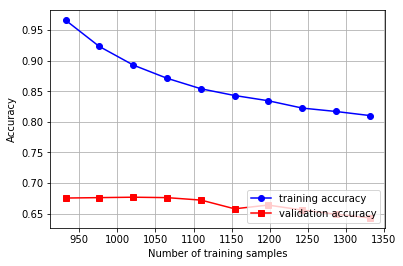

In [29]:
plt.plot(train_sizes, train_mean, color='blue', marker='o',label='training accuracy')
plt.plot(train_sizes, test_mean, color='red', marker='s',label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [50]:
dataset=dataset.sample(frac=1)
X_train2=dataset.iloc[:,0:24]
y_train2=dataset[24]


In [51]:
y_train2=np.array(y_train2)
print(y_train2)

[0 0 0 ..., 1 0 0]


In [52]:
from sklearn.svm import SVC
SVM = SVC()
SVMscores=cross_val_score(estimator=SVM,scoring='precision',X=X_train2,y=y_train2,cv=100,n_jobs=2)
print('SVM CV precision: %.3f +/- %.3f' % (np.mean(SVMscores),np.std(SVMscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM CV precision: 0.000 +/- 0.000


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT=GradientBoostingClassifier()
GBDTscores=cross_val_score(estimator=GBDT,scoring='precision',X=X_train2,y=y_train2,cv=100,n_jobs=2)
print('GBDT CV precision: %.3f +/- %.3f' % (np.mean(GBDTscores),np.std(GBDTscores)))

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GBDT CV precision: 0.641 +/- 0.314
